In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/1000_records.csv')
df.head()

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,850297,Ms.,Shawna,W,Buck,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,...,222-11-7603,702-771-7149,Las Vegas,Clark,Las Vegas,NV,89128,West,swbuck,ja8?k3BTF^]o@<&
1,304721,Mr.,Nathaniel,Z,Burke,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,...,550-99-9897,231-765-6923,Irons,Lake,Irons,MI,49644,Midwest,nzburke,tPA@4Wh9Ja$+Ln
2,412317,Drs.,Elisabeth,W,Foster,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,...,215-91-0004,270-749-4774,Lexington,Fayette,Lexington,KY,40501,South,ewfoster,5D.B4IGNkWJfG<~
3,621375,Mrs.,Briana,C,Lancaster,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,...,534-71-1053,219-623-8216,Munster,Lake,Munster,IN,46321,Midwest,bclancaster,I%?JDM;pW
4,787549,Hon.,Estella,L,Potter,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,...,644-29-6396,907-677-8486,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,elpotter,j4jkEXfC&Rh


Observations:

1. There are so many columns which will not be very useful for the model. Those will be removed.
2. There are categorical as well as numeric variables


In [3]:
df.columns

Index(['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name',
       'Gender', 'E Mail', 'Father's Name', 'Mother's Name',
       'Mother's Maiden Name', 'Date of Birth', 'Time of Birth', 'Age in Yrs.',
       'Weight in Kgs.', 'Date of Joining', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining',
       'Month Name of Joining', 'Short Month', 'Day of Joining',
       'DOW of Joining', 'Short DOW', 'Age in Company (Years)', 'Salary',
       'Last % Hike', 'SSN', 'Phone No. ', 'Place Name', 'County', 'City',
       'State', 'Zip', 'Region', 'User Name', 'Password'],
      dtype='object')

Observations:
  The following columns may not contribute to the model. So will be dropped.
  
 ['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name','E Mail', 'Father's Name', 'Mother's Name',
       'Mother's Maiden Name', 'Date of Birth', 'Time of Birth','Weight in Kgs.', 'Date of Joining','Month of Joining',
       'Month Name of Joining', 'Short Month', 'Day of Joining',
       'DOW of Joining', 'Short DOW', 'SSN', 'Phone No. ', 'User Name', 'Password']
       
Further investigation will be done on the remaining columns in the dataset.

In [55]:
data = df.drop(['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name','E Mail', "Father's Name", "Mother's Name", "Mother's Maiden Name", 'Date of Birth', 'Time of Birth','Weight in Kgs.', 'Date of Joining','Month of Joining', 'Month Name of Joining', 'Short Month', 'Day of Joining', 'DOW of Joining', 'Short DOW', 'SSN', 'Phone No. ', 'User Name', 'Password'], axis=1)
data.head()

,Gender,Age in Yrs.,Quarter of Joining,Half of Joining,Year of Joining,Age in Company (Years),Salary,Last % Hike,Place Name,County,City,State,Zip,Region
0,F,45.66,Q4,H2,2010,6.61,119090,17%,Las Vegas,Clark,Las Vegas,NV,89128,West
1,M,23.76,Q2,H1,2017,0.26,117991,14%,Irons,Lake,Irons,MI,49644,Midwest
2,F,22.68,Q1,H1,2017,0.34,161045,28%,Lexington,Fayette,Lexington,KY,40501,South
3,F,41.70,Q1,H1,2003,14.43,142616,16%,Munster,Lake,Munster,IN,46321,Midwest
4,F,22.39,Q4,H2,2016,0.79,135706,11%,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West


Pushing the target variable to the end

In [56]:
target = data['Salary']
data.drop(labels=['Salary'], axis=1, inplace = True)
data.insert(13, 'Salary', target)
data.head()

,Gender,Age in Yrs.,Quarter of Joining,Half of Joining,Year of Joining,Age in Company (Years),Last % Hike,Place Name,County,City,State,Zip,Region,Salary
0,F,45.66,Q4,H2,2010,6.61,17%,Las Vegas,Clark,Las Vegas,NV,89128,West,119090
1,M,23.76,Q2,H1,2017,0.26,14%,Irons,Lake,Irons,MI,49644,Midwest,117991
2,F,22.68,Q1,H1,2017,0.34,28%,Lexington,Fayette,Lexington,KY,40501,South,161045
3,F,41.70,Q1,H1,2003,14.43,16%,Munster,Lake,Munster,IN,46321,Midwest,142616
4,F,22.39,Q4,H2,2016,0.79,11%,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,135706


In [57]:
data.columns


Index(['Gender', 'Age in Yrs.', 'Quarter of Joining', 'Half of Joining',
       'Year of Joining', 'Age in Company (Years)', 'Last % Hike',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'Salary'],
      dtype='object')

In [58]:
#Renaming the columns
data.rename(columns={'Age in Yrs.':'Age', 'Quarter of Joining':'Joining_quarter', 'Half of Joining':'Joining_half' ,
       'Year of Joining':'Joining_year', 'Age in Company (Years)':'Experience', 'Last % Hike':'Last_hike',
       'Place Name':'Place_name'}, inplace=True)

In [59]:
data.head()

,Gender,Age,Joining_quarter,Joining_half,Joining_year,Experience,Last_hike,Place_name,County,City,State,Zip,Region,Salary
0,F,45.66,Q4,H2,2010,6.61,17%,Las Vegas,Clark,Las Vegas,NV,89128,West,119090
1,M,23.76,Q2,H1,2017,0.26,14%,Irons,Lake,Irons,MI,49644,Midwest,117991
2,F,22.68,Q1,H1,2017,0.34,28%,Lexington,Fayette,Lexington,KY,40501,South,161045
3,F,41.70,Q1,H1,2003,14.43,16%,Munster,Lake,Munster,IN,46321,Midwest,142616
4,F,22.39,Q4,H2,2016,0.79,11%,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,135706


Observations:

1. It looks like Place_name and City both have the same values. So dropping Place_name
2. The Joining_year and the Experience variables might also act alike since they both answer the same question "Since when/how long has this employee been assosiated with the company. But I would like to look at the correlation between these variables before deciding if I need to drop one of them.

In [60]:
data.drop(['Place_name'], axis=1, inplace = True)

In [61]:
data.head()

,Gender,Age,Joining_quarter,Joining_half,Joining_year,Experience,Last_hike,County,City,State,Zip,Region,Salary
0,F,45.66,Q4,H2,2010,6.61,17%,Clark,Las Vegas,NV,89128,West,119090
1,M,23.76,Q2,H1,2017,0.26,14%,Lake,Irons,MI,49644,Midwest,117991
2,F,22.68,Q1,H1,2017,0.34,28%,Fayette,Lexington,KY,40501,South,161045
3,F,41.70,Q1,H1,2003,14.43,16%,Lake,Munster,IN,46321,Midwest,142616
4,F,22.39,Q4,H2,2016,0.79,11%,Fairbanks North Star,Fairbanks,AK,99709,West,135706


Observations:

1. The Last_hike variable needs data cleaning. Remove '%' from the values and convert the values into proportions.
2. There are categorical variables available in the dataset. If we are going to use them, we'll have to do encoding. ['Gender', 'Joining_quarter', 'Joining_half', 'Joining_year','County', 'City', 'State',
 'Zip', 'Region']

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1000 non-null   object 
 1   Age              1000 non-null   float64
 2   Joining_quarter  1000 non-null   object 
 3   Joining_half     1000 non-null   object 
 4   Joining_year     1000 non-null   int64  
 5   Experience       1000 non-null   float64
 6   Last_hike        1000 non-null   object 
 7   County           1000 non-null   object 
 8   City             1000 non-null   object 
 9   State            1000 non-null   object 
 10  Zip              1000 non-null   int64  
 11  Region           1000 non-null   object 
 12  Salary           1000 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 101.7+ KB


Observations:

Although Joining_year and Zip are integers, these variables can be used to group the data.

In [63]:
data.describe()

,Age,Joining_year,Experience,Zip,Salary
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.377250,2006.992000,10.093720,48698.499000,120288.528000
std,11.107729,8.565588,8.568863,27396.021481,45178.339916
min,21.040000,1980.000000,0.000000,1002.000000,40040.000000
25%,30.925000,2002.000000,3.152500,25421.750000,82122.000000
50%,40.730000,2009.000000,7.815000,47416.500000,119409.000000
75%,49.852500,2014.000000,15.465000,71101.000000,159109.000000
max,59.980000,2017.000000,37.570000,99791.000000,199943.000000


Observations:

1. The Experience variable seem to be slightly skewed.
2. The other variables seem to be close to normal distribution.

In [126]:
data.columns

Index(['Gender', 'Age', 'Joining_quarter', 'Joining_half', 'Joining_year',
       'Experience', 'Last_hike', 'County', 'City', 'State', 'Zip', 'Region',
       'Salary'],
      dtype='object')

In [127]:
cat_data = data[['Gender','Joining_quarter', 'Joining_half', 'Joining_year','Last_hike', 'County', 'City', 'State', 'Zip', 'Region','Salary']]
cat_data.head()

,Gender,Joining_quarter,Joining_half,Joining_year,Last_hike,County,City,State,Zip,Region,Salary
0,F,Q4,H2,2010,17,Clark,Las Vegas,NV,89128,West,119090
1,M,Q2,H1,2017,14,Lake,Irons,MI,49644,Midwest,117991
2,F,Q1,H1,2017,28,Fayette,Lexington,KY,40501,South,161045
3,F,Q1,H1,2003,16,Lake,Munster,IN,46321,Midwest,142616
4,F,Q4,H2,2016,11,Fairbanks North Star,Fairbanks,AK,99709,West,135706


In [128]:
cat_data.describe()

,Joining_year,Last_hike,Zip,Salary
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2006.992000,15.473000,48698.499000,120288.528000
std,8.565588,8.984096,27396.021481,45178.339916
min,1980.000000,0.000000,1002.000000,40040.000000
25%,2002.000000,8.000000,25421.750000,82122.000000
50%,2009.000000,16.000000,47416.500000,119409.000000
75%,2014.000000,23.000000,71101.000000,159109.000000
max,2017.000000,30.000000,99791.000000,199943.000000


In [66]:
data.head()

,Gender,Age,Joining_quarter,Joining_half,Joining_year,Experience,Last_hike,County,City,State,Zip,Region,Salary
0,F,45.66,Q4,H2,2010,6.61,17%,Clark,Las Vegas,NV,89128,West,119090
1,M,23.76,Q2,H1,2017,0.26,14%,Lake,Irons,MI,49644,Midwest,117991
2,F,22.68,Q1,H1,2017,0.34,28%,Fayette,Lexington,KY,40501,South,161045
3,F,41.70,Q1,H1,2003,14.43,16%,Lake,Munster,IN,46321,Midwest,142616
4,F,22.39,Q4,H2,2016,0.79,11%,Fairbanks North Star,Fairbanks,AK,99709,West,135706


In [67]:
data['Last_hike'] = data['Last_hike'].apply(lambda x: x.strip('%')).astype('int64')
data.head()

,Gender,Age,Joining_quarter,Joining_half,Joining_year,Experience,Last_hike,County,City,State,Zip,Region,Salary
0,F,45.66,Q4,H2,2010,6.61,17,Clark,Las Vegas,NV,89128,West,119090
1,M,23.76,Q2,H1,2017,0.26,14,Lake,Irons,MI,49644,Midwest,117991
2,F,22.68,Q1,H1,2017,0.34,28,Fayette,Lexington,KY,40501,South,161045
3,F,41.70,Q1,H1,2003,14.43,16,Lake,Munster,IN,46321,Midwest,142616
4,F,22.39,Q4,H2,2016,0.79,11,Fairbanks North Star,Fairbanks,AK,99709,West,135706


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1000 non-null   object 
 1   Age              1000 non-null   float64
 2   Joining_quarter  1000 non-null   object 
 3   Joining_half     1000 non-null   object 
 4   Joining_year     1000 non-null   int64  
 5   Experience       1000 non-null   float64
 6   Last_hike        1000 non-null   int64  
 7   County           1000 non-null   object 
 8   City             1000 non-null   object 
 9   State            1000 non-null   object 
 10  Zip              1000 non-null   int64  
 11  Region           1000 non-null   object 
 12  Salary           1000 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 101.7+ KB


In [88]:
data.isnull().sum()

Gender             0
Age                0
Joining_quarter    0
Joining_half       0
Joining_year       0
Experience         0
Last_hike          0
County             0
City               0
State              0
Zip                0
Region             0
Salary             0
dtype: int64

In [69]:
data.Last_hike.unique()

array([17, 14, 28, 16, 11,  4, 13,  1, 20, 21, 24, 15, 22, 19,  3,  5,  6,
       26, 30, 10,  9, 25, 18,  2,  8, 12,  0, 29, 27,  7, 23],
      dtype=int64)

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import numpy as np
from scipy.stats import norm

In [71]:
data.head()

,Gender,Age,Joining_quarter,Joining_half,Joining_year,Experience,Last_hike,County,City,State,Zip,Region,Salary
0,F,45.66,Q4,H2,2010,6.61,17,Clark,Las Vegas,NV,89128,West,119090
1,M,23.76,Q2,H1,2017,0.26,14,Lake,Irons,MI,49644,Midwest,117991
2,F,22.68,Q1,H1,2017,0.34,28,Fayette,Lexington,KY,40501,South,161045
3,F,41.70,Q1,H1,2003,14.43,16,Lake,Munster,IN,46321,Midwest,142616
4,F,22.39,Q4,H2,2016,0.79,11,Fairbanks North Star,Fairbanks,AK,99709,West,135706


In [124]:
for i in data.Gender.unique():
    print(i)
    print(data[data['Gender']==i]['Salary'].mean())

F
117949.1283095723
M
122545.19842829077


Gender


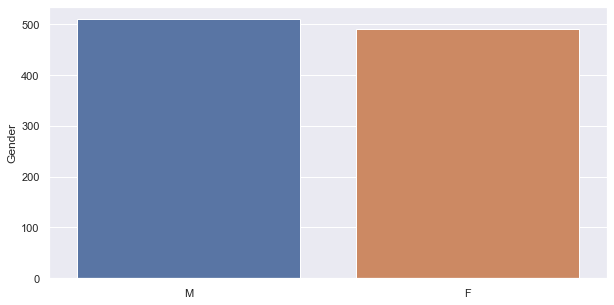

Joining_quarter


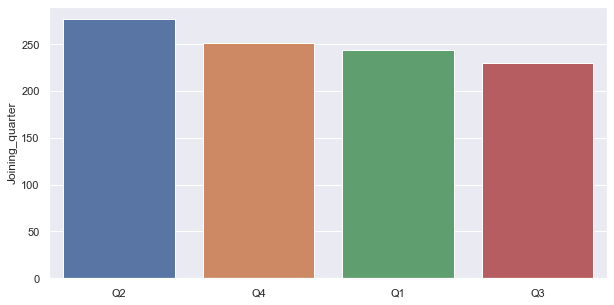

Joining_half


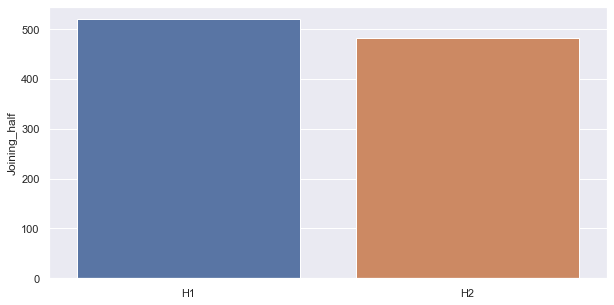

Joining_year


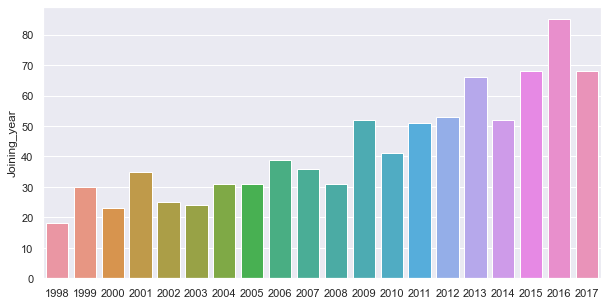

Last_hike


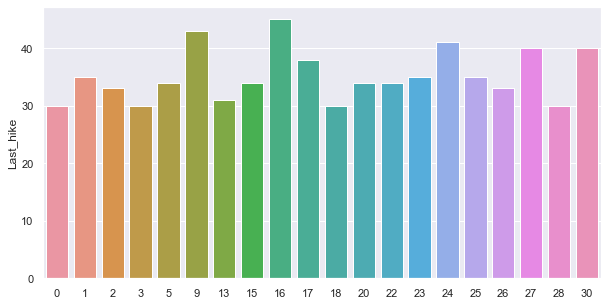

County


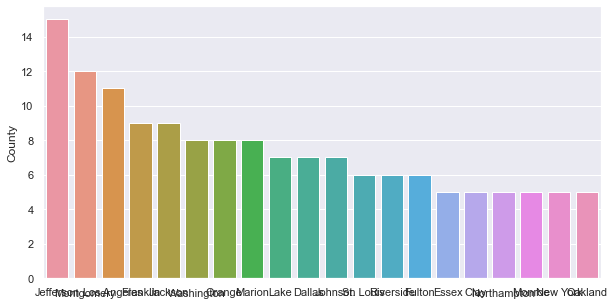

City


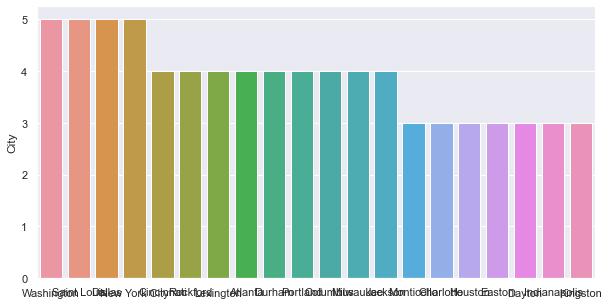

State


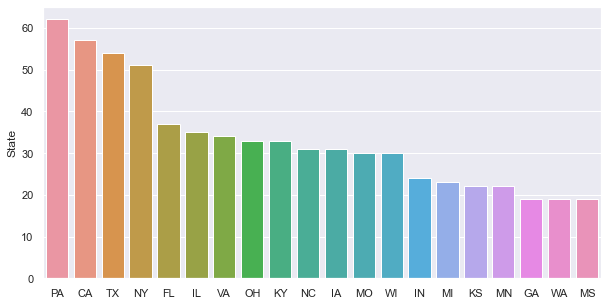

Zip


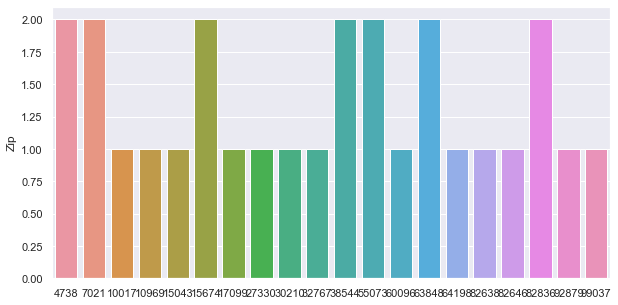

Region


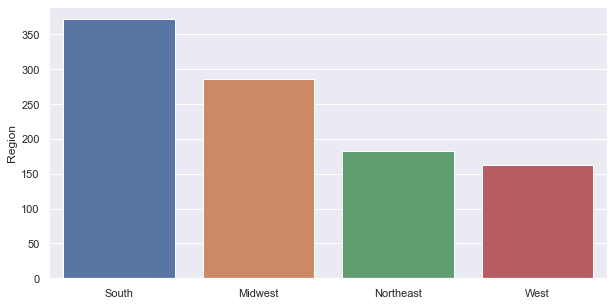

In [131]:
for i in cat_data.drop(['Salary'],axis=1).columns:
    cat_num = cat_data[i].value_counts()[:20]
    print(i)
    sns.barplot(cat_num.index, cat_num)
    plt.show()

In [132]:
data.columns

Index(['Gender', 'Age', 'Joining_quarter', 'Joining_half', 'Joining_year',
       'Experience', 'Last_hike', 'County', 'City', 'State', 'Zip', 'Region',
       'Salary'],
      dtype='object')

In [154]:
pd.pivot_table(data, index = 'Region', values = 'Salary').sort_values(by=['Salary'], ascending=False)

,Salary
Region,
Midwest,122633.645614
South,119731.595687
Northeast,118978.379121
West,118910.197531


In [157]:
pd.pivot_table(data, index = ['Joining_half','Joining_quarter'], values = 'Salary')

Salary
Joining_half Joining_quarter               
H1           Q1               120068.037037
             Q2               119992.503623
H2           Q3               125039.721739
             Q4               116473.816733

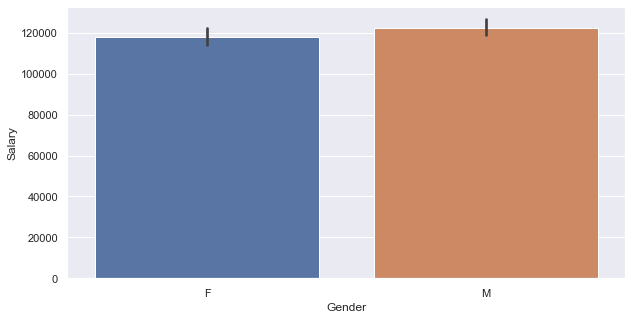

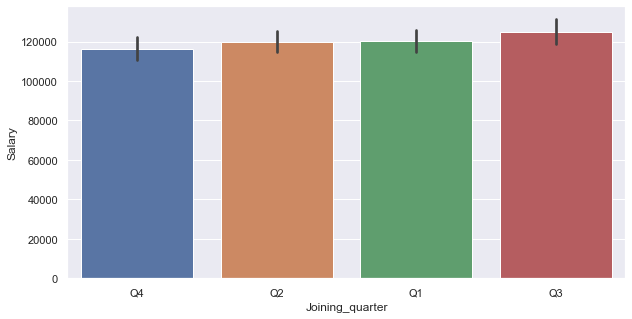

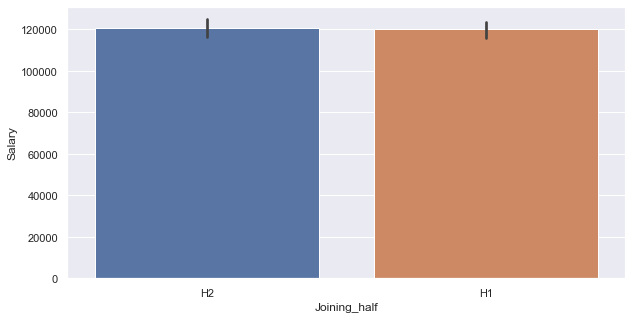

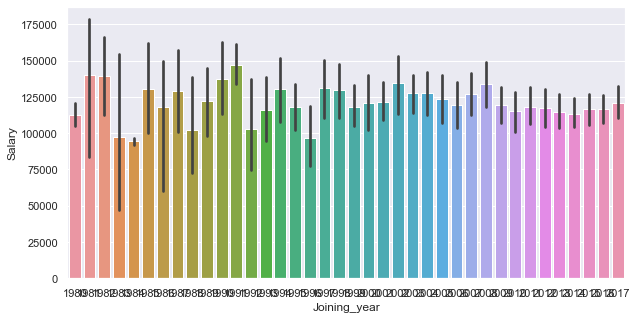

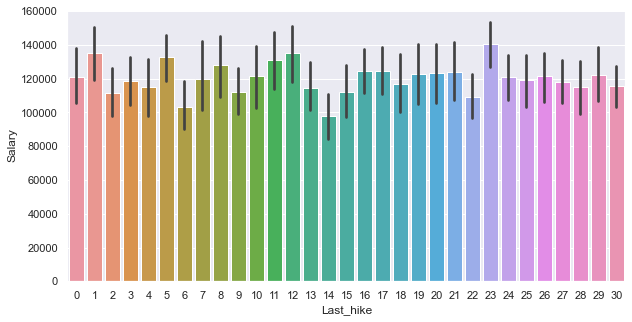

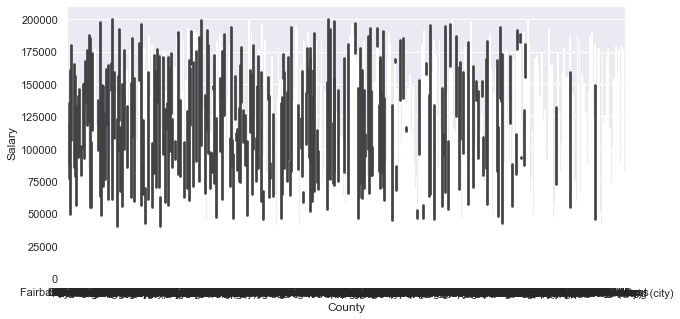

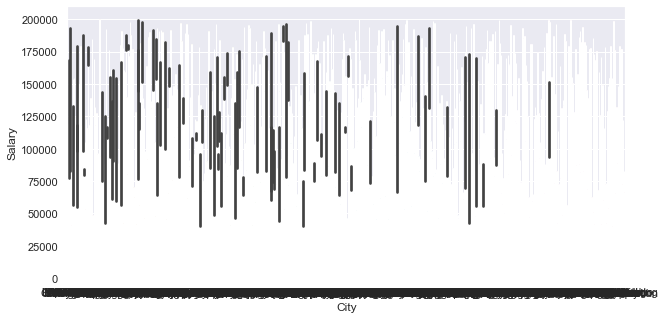

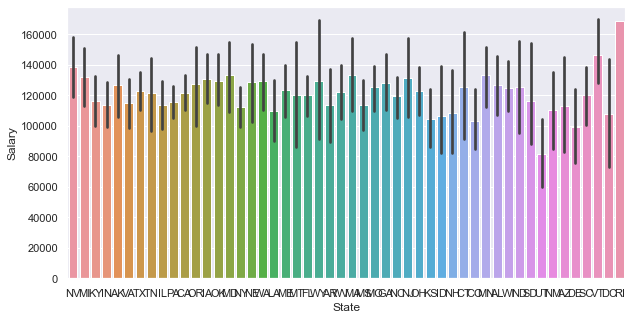

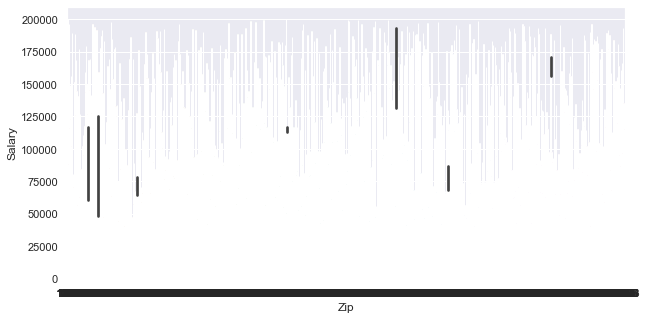

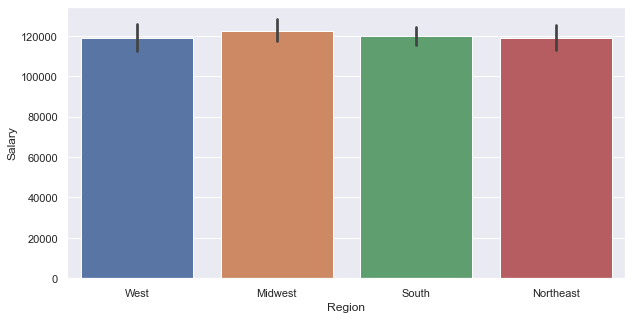

In [129]:
for i in cat_data.drop(['Salary'],axis=1).columns:
    sns.barplot(x=i,y='Salary',data=cat_data)
    plt.show()

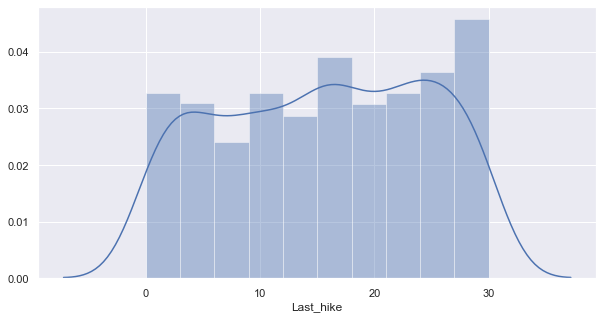

In [119]:
sns.distplot(data['Last_hike'])

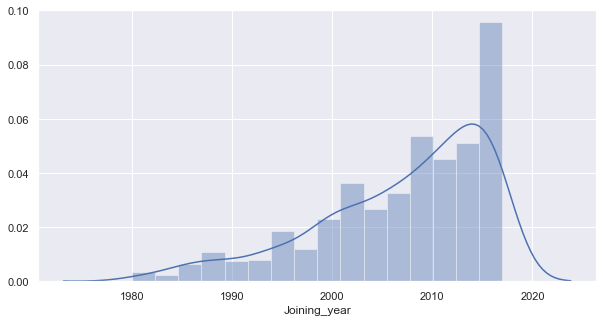

In [115]:
sns.distplot(data['Joining_year'])

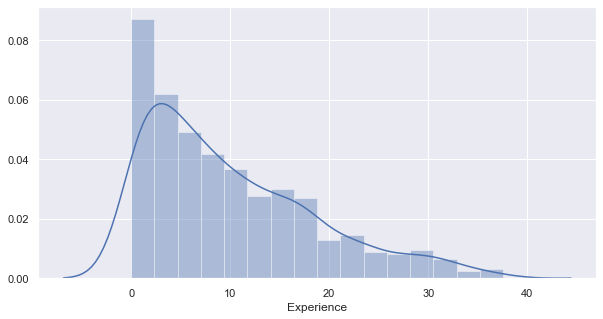

In [116]:
sns.distplot(data['Experience'])

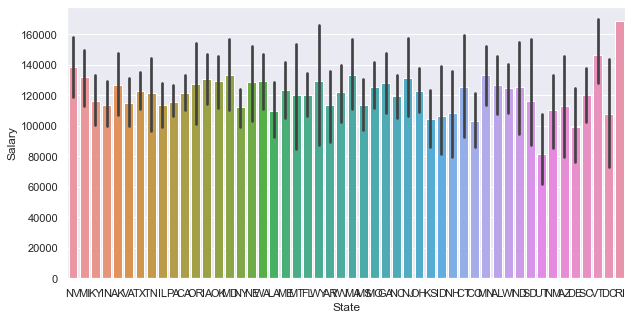

In [125]:
sns.barplot(x='State', y='Salary', data=data)

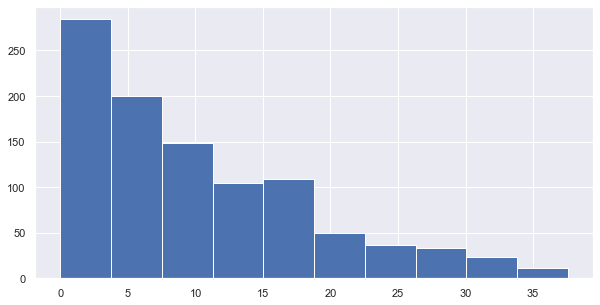

In [110]:
data.Experience.hist()

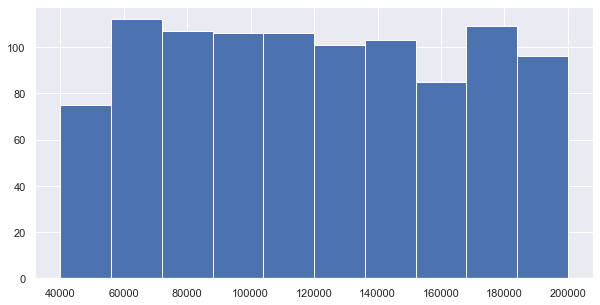

In [111]:
data.Salary.hist()

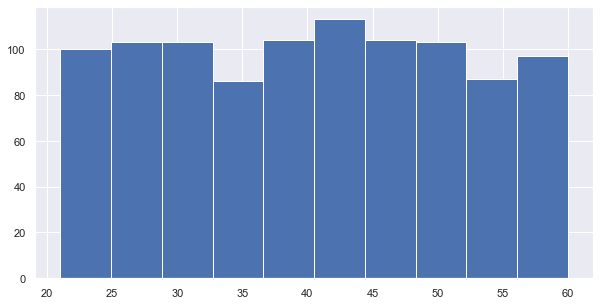

In [112]:
data.Age.hist()

In [109]:
data[['State','Salary']].mean()

Salary    120288.528
dtype: float64

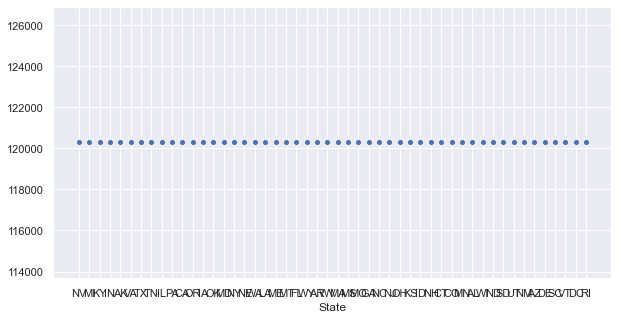

In [108]:
sns.scatterplot(data['State'], data['Salary'].mean())

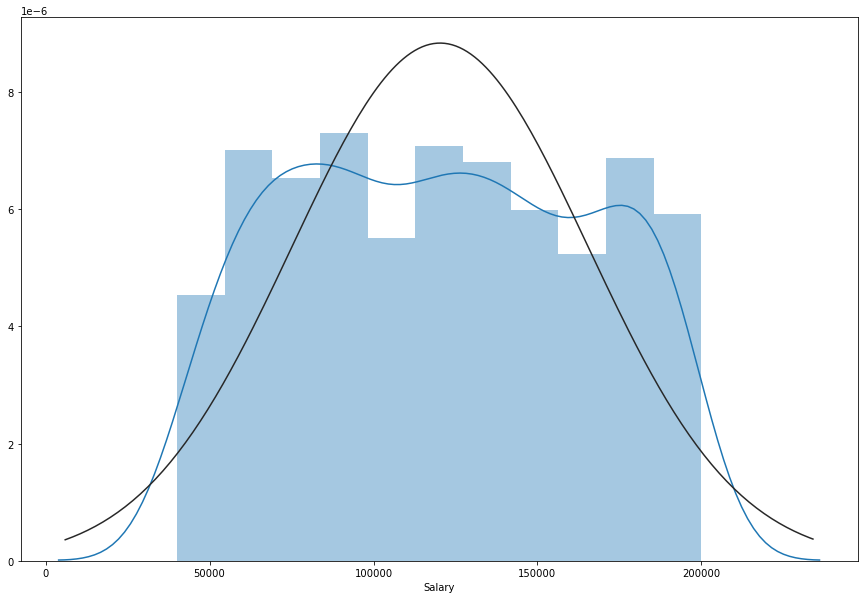

In [92]:
plt.figure(figsize=(15,10))
sns.distplot(data['Salary'], fit = norm)


In [158]:
from sklearn.linear_model import LogisticRegression

In [173]:
data.columns

Index(['Gender', 'Age', 'Joining_quarter', 'Joining_half', 'Joining_year',
       'Experience', 'Last_hike', 'County', 'City', 'State', 'Zip', 'Region',
       'Salary'],
      dtype='object')

In [187]:
pt= PowerTransformer(standardize=True)
s = pt.fit_transform(data[['Salary']])

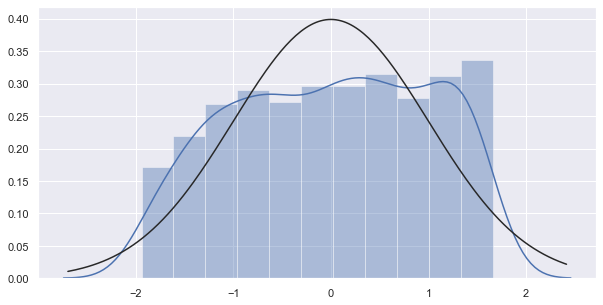

In [188]:
sns.distplot(s, fit=norm)

In [223]:
for col in data[['Gender','Joining_quarter', 'Joining_half', 'Joining_year','Last_hike', 'County', 'City', 'State', 'Zip', 'Region']].columns:
    X= data[['Salary']]
    y = data[col]
    lr = LogisticRegression()
    lr.fit(X,y)
    print(f'Score for {col} is : {lr.score(X,y)}')
    print('Summary:',lr.get_params())

Score for Gender is : 0.509
Summary: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Score for Joining_quarter is : 0.276
Summary: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Score for Joining_half is : 0.519
Summary: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Score for Joining_year is : 0.085
Summary: 

Gender


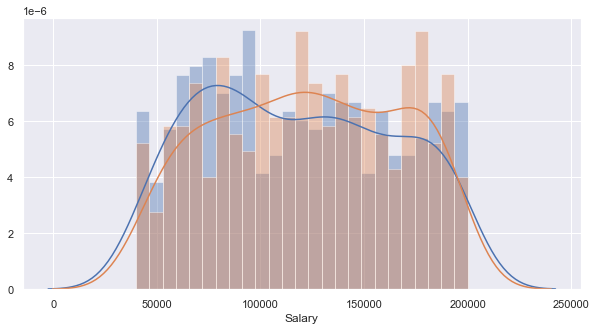

Joining_quarter


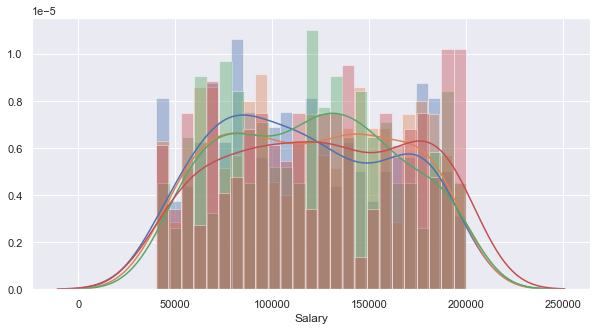

Joining_half


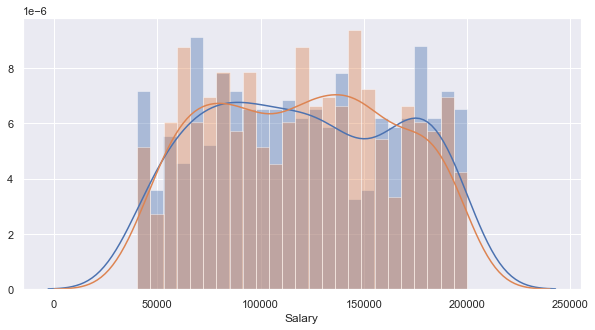

Joining_year


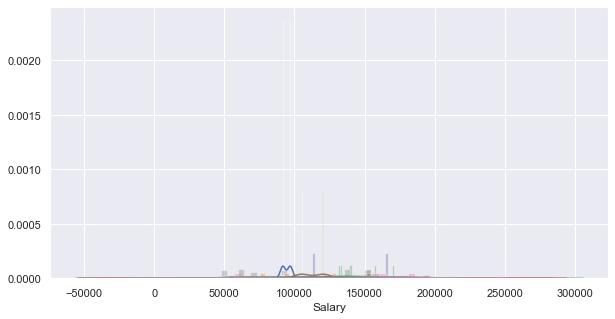

Last_hike


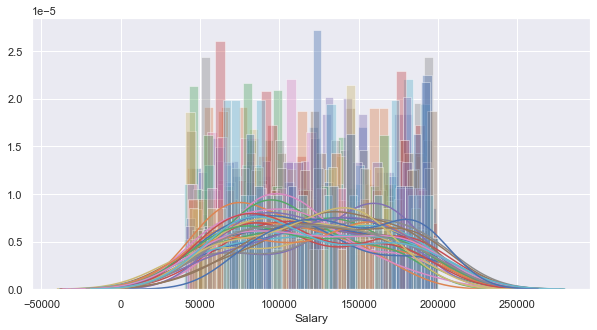

County


X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

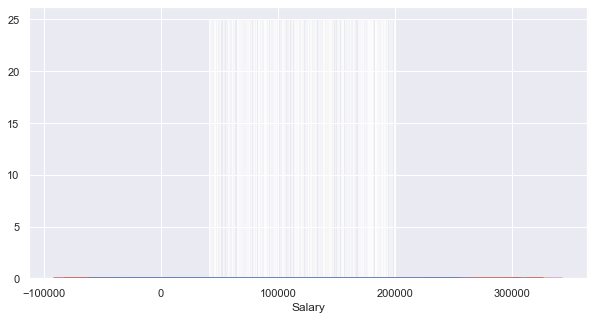

City


X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

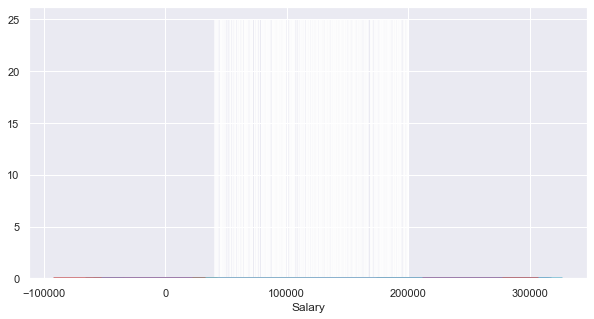

State


X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


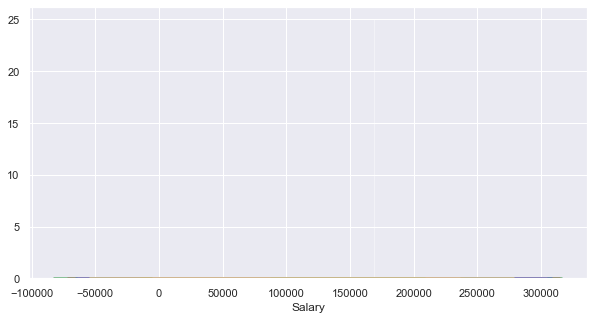

Zip


X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
X:\AnacondaEnvironment\anaconda3\lib\site-packages

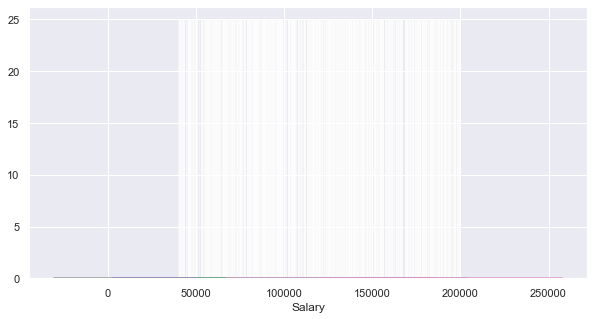

Region


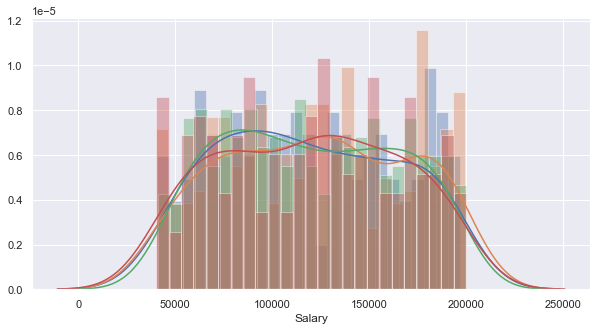

In [194]:
for col in data[['Gender','Joining_quarter', 'Joining_half', 'Joining_year','Last_hike', 'County', 'City', 'State', 'Zip', 'Region']].columns:
    print(col)
    for i in data[col].unique():
        sns.distplot(data[data[col]==i]['Salary'], bins=25,kde=True)
    plt.show()

In [226]:
from scipy.stats import f_oneway,kruskal,pointbiserialr
print(f_oneway(data[data['Joining_half']=='H1']['Salary'],data[data['Joining_half']=='H2']['Salary']))
print(kruskal(data[data['Gender']=='M']['Salary'],data[data['Gender']=='F']['Salary']))
g = data['Gender'].apply(lambda x : 0 if x == 'M' else 1)
print(pointbiserialr(g,data['Salary']))

F_onewayResult(statistic=0.035882932827741146, pvalue=0.8497959693149768)
KruskalResult(statistic=2.63452017340059, pvalue=0.10456364708802733)
PointbiserialrResult(correlation=-0.050883065768531154, pvalue=0.10781479429226405)


In [213]:
data['Salary'].var()

2041082397.5247378

In [219]:
data[data['Joining_half']=='H1']['Salary'].var() / data['Salary'].var()

0.9521459761461376

In [220]:
data[data['Joining_half']=='H2']['Salary'].var() / data['Salary'].var()

1.0536509724167575

In [ ]:
for col in data[['Gender','Joining_quarter', 'Joining_half', 'Joining_year','Last_hike', 'County', 'City', 'State', 'Zip', 'Region']].columns:
    f,p = f_oneway(df[df[col]==1][col],df[df['Class']==2][col],df[df['Class']==3][col])
    if p <= 0.05:
        print(f'The means of Classes 1, 2 and 3 for "{col}" variable are \033[1m significantly different \033[0m.')
    else:
        print(f'The means of Classes 1, 2 and 3 for "{col}" variable are \033[1m Not significantly different \033[0m.')


In [ ]:
sns.set(rc={"figure.figsize": (10, 5)})


for col in df.drop(['Class'], axis=1).columns:    
    for i in df['Class'].unique():
        plt.title(f'Normal distribution of {col} for Classes 1,2 and 3')
        sns.distplot(df[df['Class']==i][col], bins=25,kde=True)
    plt.legend([1,2,3])
    plt.show()

In [50]:
pt = PowerTransformer()
data['Salary']=pt.fit_transform(data[['Salary']])

In [51]:
data.Salary

0      0.030584
1      0.006567
2      0.905676
3      0.530541
4      0.386340
         ...   
995   -1.045159
996    0.092766
997   -0.803278
998   -1.199758
999   -0.280878
Name: Salary, Length: 1000, dtype: float64

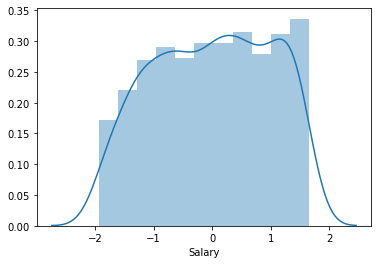

In [52]:
sns.distplot(data['Salary'])

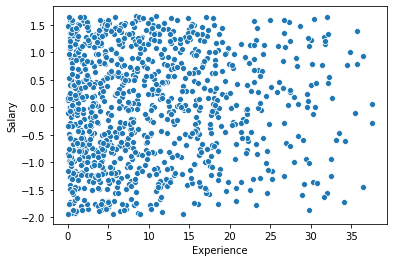

In [53]:
sns.scatterplot(data['Experience'], data['Salary'])

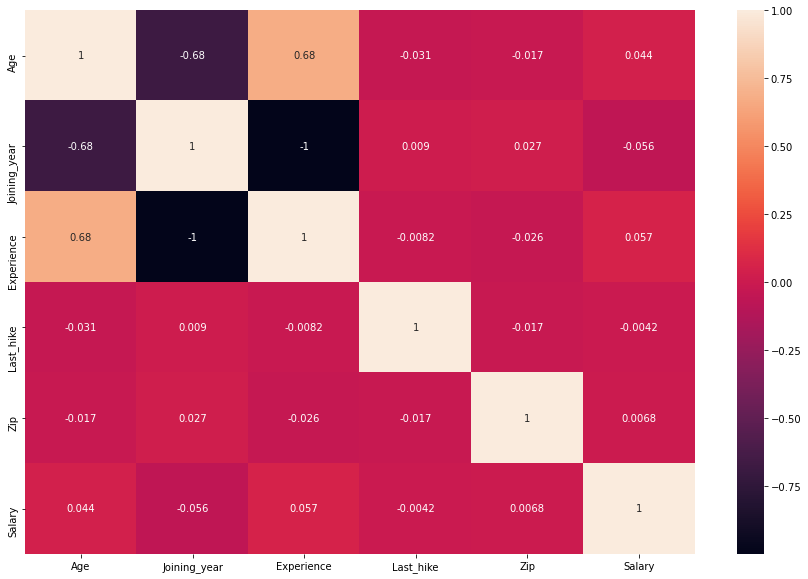

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

Strong Multicollinearity between Experience and Joining year - Remove Joining_year

Multicollinearity between Experience and Age - Remove Age
